In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

2023-06-01 13:32:07.967192: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
def rmse(y_true, y_pred):
    return np.sqrt(np.nanmean((y_true - y_pred)**2))

# Open dict with collocated SAR data

In [3]:
data_dir = "/lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/"

In [4]:
with open(data_dir + 'collocated_dict_5e_5_filtered_sar_era5.pickle', 'rb') as handle:
        d = pickle.load(handle)

In [5]:
df = pd.concat(d.values(), ignore_index=True)
df

CE        CN          IR           Lv          P10         Pair  \
0    0.131507  0.306354  344.480002  2476.816541  1005.776480  1006.983499   
1    0.169644  0.076862  301.660002  2477.280367  1011.450370  1012.675998   
2    0.025622 -0.383063  274.325002  2476.904365  1020.987403  1022.212997   
3   -0.202953 -0.490062  309.255003  2476.669098  1013.606853  1014.807996   
4   -0.026441 -0.730744  320.615001  2475.218603  1018.266915  1019.488495   
..        ...       ...         ...          ...          ...          ...   
405  0.078067 -0.018678  257.755003  2492.003937   994.435538   995.682013   
406  0.078067 -0.018678  257.135000  2491.579194   994.525701   995.769507   
407  0.078067 -0.018678  238.530001  2491.798855   999.285638  1000.545505   
408  0.078067 -0.018678  266.660001  2491.502372  1002.762277  1004.015002   
409  0.078067 -0.018678  267.574999  2491.964731   999.145041  1000.397998   

          Q10      Qair         RH       RH10  ...  valid_flag    s0_norm  \
0    5.750744  5.858569  73.541799  72.235029  ...        True  -7.755438   
1    5.016032  5.128066  77.170098  76.182660  ...        True  -7.311450   
2    4.964464  5.199127  66.090098  63.038793  ...        True -10.255534   
3    4.241058  4.533348  44.618498  40.755557  ...        True  -8.636513   
4    7.084940  7.120605  91.120398  91.004979  ...        True -14.836988   
..        ...       ...        ...        ...  ...         ...        ...   
405  2.661181  2.718112  73.889103  72.947993  ...        True  -9.140169   
406  2.913308  2.980954  77.774753  76.929502  ...        True  -9.058357   
407  2.513606  2.630492  80.575903  79.902359  ...        True  -6.148265   
408  2.848601  2.917305  75.022252  74.087723  ...        True -11.094656   
409  2.850011  2.943405  81.332702  79.900122  ...        True  -7.744822   

            s0        inc          az     s0_max     s0_min  s0_std  \
0    -8.815776  32.142911  280.917511  -8.815776  -8.815776     0.0   
1   -15.691008  42.147045  279.718475 -15.691008 -15.691008     0.0   
2   -13.824358  32.153725  280.917114 -13.824358 -13.824358     0.0   
3   -18.343288  42.149823  279.718201 -18.343288 -18.343288     0.0   
4   -22.981560  32.146370  280.917114 -22.981560 -22.981560     0.0   
..         ...        ...         ...        ...        ...     ...   
405 -12.834813  33.753190  281.969360 -12.834813 -12.834813     0.0   
406 -17.941219  40.544464  439.776978 -17.941219 -17.941219     0.0   
407 -12.268633  40.734668  280.223236 -12.268633 -12.268633     0.0   
408 -16.578063  33.539628  438.030487 -16.578063 -16.578063     0.0   
409 -10.038090  33.745420  281.969055 -10.038090 -10.038090     0.0   

           u10        v10  
0    -1.079882  11.277792  
1    10.322560   3.875976  
2    -4.728710  -3.410125  
3    -9.923150  -0.006022  
4    -1.088014  -4.630033  
..         ...        ...  
405   4.967300   2.593653  
406   5.609658   7.776169  
407   8.168199   3.338481  
408   4.111084   9.533497  
409  13.912084   7.032796  

[410 rows x 63 columns]

In [6]:
df = df.dropna(subset=['UWr', 'rhoair'])
df

CE        CN          IR           Lv          P10         Pair  \
0    0.131507  0.306354  344.480002  2476.816541  1005.776480  1006.983499   
1    0.169644  0.076862  301.660002  2477.280367  1011.450370  1012.675998   
2    0.025622 -0.383063  274.325002  2476.904365  1020.987403  1022.212997   
3   -0.202953 -0.490062  309.255003  2476.669098  1013.606853  1014.807996   
4   -0.026441 -0.730744  320.615001  2475.218603  1018.266915  1019.488495   
..        ...       ...         ...          ...          ...          ...   
405  0.078067 -0.018678  257.755003  2492.003937   994.435538   995.682013   
406  0.078067 -0.018678  257.135000  2491.579194   994.525701   995.769507   
407  0.078067 -0.018678  238.530001  2491.798855   999.285638  1000.545505   
408  0.078067 -0.018678  266.660001  2491.502372  1002.762277  1004.015002   
409  0.078067 -0.018678  267.574999  2491.964731   999.145041  1000.397998   

          Q10      Qair         RH       RH10  ...  valid_flag    s0_norm  \
0    5.750744  5.858569  73.541799  72.235029  ...        True  -7.755438   
1    5.016032  5.128066  77.170098  76.182660  ...        True  -7.311450   
2    4.964464  5.199127  66.090098  63.038793  ...        True -10.255534   
3    4.241058  4.533348  44.618498  40.755557  ...        True  -8.636513   
4    7.084940  7.120605  91.120398  91.004979  ...        True -14.836988   
..        ...       ...        ...        ...  ...         ...        ...   
405  2.661181  2.718112  73.889103  72.947993  ...        True  -9.140169   
406  2.913308  2.980954  77.774753  76.929502  ...        True  -9.058357   
407  2.513606  2.630492  80.575903  79.902359  ...        True  -6.148265   
408  2.848601  2.917305  75.022252  74.087723  ...        True -11.094656   
409  2.850011  2.943405  81.332702  79.900122  ...        True  -7.744822   

            s0        inc          az     s0_max     s0_min  s0_std  \
0    -8.815776  32.142911  280.917511  -8.815776  -8.815776     0.0   
1   -15.691008  42.147045  279.718475 -15.691008 -15.691008     0.0   
2   -13.824358  32.153725  280.917114 -13.824358 -13.824358     0.0   
3   -18.343288  42.149823  279.718201 -18.343288 -18.343288     0.0   
4   -22.981560  32.146370  280.917114 -22.981560 -22.981560     0.0   
..         ...        ...         ...        ...        ...     ...   
405 -12.834813  33.753190  281.969360 -12.834813 -12.834813     0.0   
406 -17.941219  40.544464  439.776978 -17.941219 -17.941219     0.0   
407 -12.268633  40.734668  280.223236 -12.268633 -12.268633     0.0   
408 -16.578063  33.539628  438.030487 -16.578063 -16.578063     0.0   
409 -10.038090  33.745420  281.969055 -10.038090 -10.038090     0.0   

           u10        v10  
0    -1.079882  11.277792  
1    10.322560   3.875976  
2    -4.728710  -3.410125  
3    -9.923150  -0.006022  
4    -1.088014  -4.630033  
..         ...        ...  
405   4.967300   2.593653  
406   5.609658   7.776169  
407   8.168199   3.338481  
408   4.111084   9.533497  
409  13.912084   7.032796  

[410 rows x 63 columns]

In [7]:
df = df.sample(frac = 1, random_state=77)
df     

CE        CN          IR           Lv          P10         Pair  \
300 -0.012150 -0.032903  327.125002  2491.398764  1034.871906  1036.155530   
381  0.078067 -0.018678  316.379997  2486.020202  1001.087127  1002.327002   
108 -0.048482 -0.054835  333.104999  2477.888062  1011.927463  1013.146500   
94   0.098618 -0.014385  353.225000  2481.278990  1014.799327  1016.010495   
289 -0.012150 -0.032903  293.824998  2491.803394  1008.456695  1009.699500   
..        ...       ...         ...          ...          ...          ...   
293 -0.012150 -0.032903  339.339998  2490.820422   993.575404   994.797507   
235 -0.012150 -0.032903  263.644999  2487.925266   991.189028   992.409497   
84  -0.315976  0.132105  333.880003  2471.162107  1000.264070  1001.478503   
95  -0.009993  0.031252  282.370000  2485.421032  1020.108655  1021.350995   
215 -0.011104 -0.115881  346.885004  2476.713532  1011.273739  1012.491513   

          Q10      Qair         RH       RH10  ...  valid_flag    s0_norm  \
300  4.100282  4.110465  95.989404  96.187439  ...        True -14.918911   
381  4.116639  4.159194  91.359453  91.275100  ...        True  -8.355029   
108  6.965927  6.980134  93.698100  93.687086  ...        True  -9.694715   
94   7.905501  7.798062  91.634647  91.269765  ...        True  -6.935540   
289  4.259576  4.288183  86.213853  85.824327  ...        True -11.330360   
..        ...       ...        ...        ...  ...         ...        ...   
293  4.975317  4.980046  95.771354  95.886296  ...        True  -9.551195   
235  4.218824  4.268435  82.945053  82.477130  ...        True  -8.971364   
84   5.270402  5.393428  84.232098  83.587054  ...        True  -7.685976   
95   5.237911  5.273152  88.951097  88.615952  ...        True  -9.699736   
215  5.423657  5.477614  71.757653  71.205217  ...        True -10.245456   

            s0        inc          az     s0_max     s0_min  s0_std       u10  \
300 -29.809161  40.733684  280.224518 -29.809161 -29.809161     0.0  6.045154   
381 -16.680374  40.732366  280.222870 -16.680374 -16.680374     0.0  8.021218   
108 -19.353100  40.723802  280.224518 -19.353100 -19.353100     0.0 -5.669697   
94  -15.135897  42.400538  440.389984 -15.135897 -15.135897     0.0  6.495847   
289 -17.218870  33.757924  282.000641 -17.218870 -17.218870     0.0  6.045154   
..         ...        ...         ...        ...        ...     ...       ...   
293 -13.658052  33.754719  282.000427 -13.658052 -13.658052     0.0  6.045154   
235 -17.913435  40.732870  280.222595 -17.913435 -17.913435     0.0  2.151350   
84  -16.634214  42.397246  440.389404 -16.634214 -16.634214     0.0  3.966743   
95  -12.334466  31.666229  439.104034 -12.334466 -12.334466     0.0  7.627155   
215 -20.461043  40.732127  280.224121 -20.461043 -20.461043     0.0 -0.009023   

           v10  
300   7.037160  
381  -1.367607  
108  -2.507397  
94   11.473030  
289   7.037160  
..         ...  
293   7.037160  
235  -7.729190  
84   -7.637461  
95    2.237181  
215   1.070539  

[410 rows x 63 columns]

In [8]:
c = df['stress']
y = - df['UWr'] * df['rhoair']

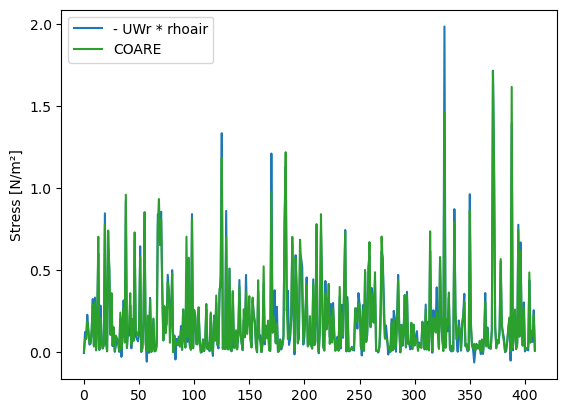

In [9]:
plt.plot(y.values, label='- UWr * rhoair')
plt.plot(c.values, label='COARE', color='C2')
plt.ylabel('Stress [N/m²]')       
plt.legend()

In [10]:
df = df[( (df['UWr'] >= -2) & (df['UWr'] <= 2) )]               

In [11]:
400*0.8

320.0

In [12]:
split_idx = 320

# S0, inc, az

# Prepare features and labels

In [13]:
predictor_variables = ['s0', 'inc', 'az', 'u10', 'v10']

In [14]:
x = df[predictor_variables]
x

s0        inc          az       u10        v10
300 -29.809161  40.733684  280.224518  6.045154   7.037160
381 -16.680374  40.732366  280.222870  8.021218  -1.367607
108 -19.353100  40.723802  280.224518 -5.669697  -2.507397
94  -15.135897  42.400538  440.389984  6.495847  11.473030
289 -17.218870  33.757924  282.000641  6.045154   7.037160
..         ...        ...         ...       ...        ...
293 -13.658052  33.754719  282.000427  6.045154   7.037160
235 -17.913435  40.732870  280.222595  2.151350  -7.729190
84  -16.634214  42.397246  440.389404  3.966743  -7.637461
95  -12.334466  31.666229  439.104034  7.627155   2.237181
215 -20.461043  40.732127  280.224121 -0.009023   1.070539

[410 rows x 5 columns]

In [15]:
y = - df['UWr'] * df['rhoair']
y

300   -0.003707
381    0.124103
108    0.083250
94     0.229089
289    0.130489
         ...   
293    0.079242
235    0.116743
84     0.063755
95     0.256668
215    0.016093
Length: 410, dtype: float64

NaNs: 

2018-12-04 11:10:59.993607         NaN

2018-12-16 23:11:59.981755         NaN

# COARE

In [25]:
c = df['stress']

In [17]:
x_train = x[:split_idx]
x_test = x[split_idx:]

In [18]:
y_train = y[:split_idx]
y_test = y[split_idx:]

In [26]:
c_train = c[:split_idx]
c_test = c[split_idx:]

In [20]:
# Compute average and std of the training data
x_train_mean = np.nanmean(x_train, axis=0)
x_train_std = np.nanstd(x_train, axis=0)

y_train_mean = np.nanmean(y_train, axis=0)
y_train_std = np.nanstd(y_train,axis=0)

# Normalize
x_train_norm = (x_train - x_train_mean) / x_train_std
x_test_norm = (x_test - x_train_mean) / x_train_std
y_train_norm = (y_train - y_train_mean) / y_train_std
y_test_norm = (y_test - y_train_mean) / y_train_std

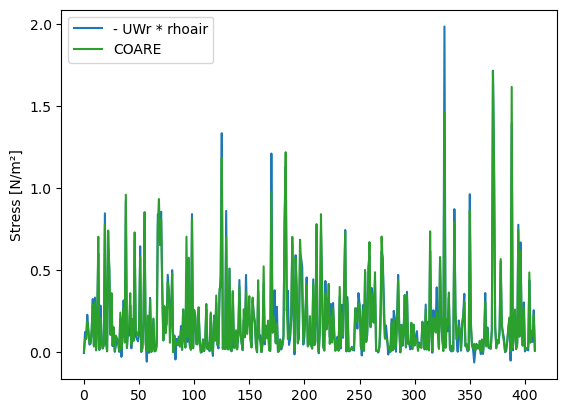

In [21]:

plt.plot(y.values, label='- UWr * rhoair')
plt.plot(c.values, label='COARE', color='C2')
plt.ylabel('Stress [N/m²]')       
plt.legend()

# ML setup

In [22]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [23]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

Variables do not exist


# First experiment - Linear regression

In [25]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    #tf.keras.layers.Dense(16, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
7/7 [==============================] - 0s 14ms/step - loss: 3.9011 - mean_absolute_error: 1.4658 - val_loss: 2.8745 - val_mean_absolute_error: 1.3023
Epoch 2/500
7/7 [==============================] - 0s 4ms/step - loss: 3.3324 - mean_absolute_error: 1.4068 - val_loss: 2.8386 - val_mean_absolute_error: 1.2942
Epoch 3/500
7/7 [==============================] - 0s 3ms/step - loss: 4.0188 - mean_absolute_error: 1.4793 - val_loss: 2.8022 - val_mean_absolute_error: 1.2861
Epoch 4/500
7/7 [==============================] - 0s 4ms/step - loss: 4.1856 - mean_absolute_error: 1.4931 - val_loss: 2.7678 - val_mean_absolute_error: 1.2783
Epoch 5/500
7/7 [==============================] - 0s 4ms/step - loss: 3.6642 - mean_absolute_error: 1.4092 - val_loss: 2.7333 - val_mean_absolute_error: 1.2704
Epoch 6/500
7/7 [==============================] - 0s 4ms/step - loss: 4.4652 - mean_absolute_error: 1.5292 - val_loss: 2.6990 - val_mean_absolute_error: 1.2628
Epoch 7/500
7/7 [================

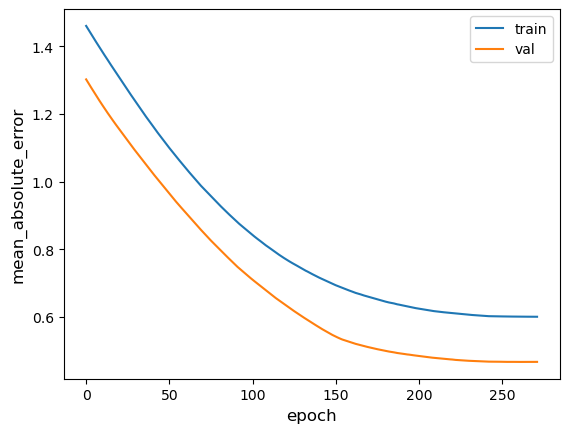

3/3 [==============================] - 0s 1ms/step - loss: 1.5863 - mean_absolute_error: 0.6994
Test accuracy 0.6994426250457764
Test loss 1.5863417387008667


In [26]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [27]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [28]:
np.mean(y_test)

0.20288953337977453

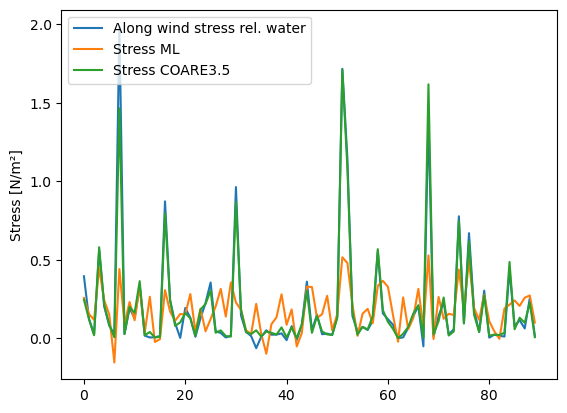

In [29]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [30]:
rmse(y_test.values, y_test_pred)

0.38231015700210497

In [31]:
rmse(y_test.values, c_test)

0.06884559918794826

# Other experiments

In [32]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [33]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [34]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
7/7 [==============================] - 0s 17ms/step - loss: 2.8396 - mean_absolute_error: 1.2570 - val_loss: 0.7933 - val_mean_absolute_error: 0.6441
Epoch 2/500
7/7 [==============================] - 0s 4ms/step - loss: 2.6085 - mean_absolute_error: 1.1246 - val_loss: 0.7891 - val_mean_absolute_error: 0.6413
Epoch 3/500
7/7 [==============================] - 0s 4ms/step - loss: 1.8129 - mean_absolute_error: 1.0202 - val_loss: 0.7845 - val_mean_absolute_error: 0.6381
Epoch 4/500
7/7 [==============================] - 0s 4ms/step - loss: 1.8525 - mean_absolute_error: 1.0258 - val_loss: 0.7801 - val_mean_absolute_error: 0.6347
Epoch 5/500
7/7 [==============================] - 0s 4ms/step - loss: 1.7006 - mean_absolute_error: 1.0048 - val_loss: 0.7755 - val_mean_absolute_error: 0.6308
Epoch 6/500
7/7 [==============================] - 0s 4ms/step - loss: 1.7777 - mean_absolute_error: 1.0062 - val_loss: 0.7712 - val_mean_absolute_error: 0.6276
Epoch 7/500
7/7 [================

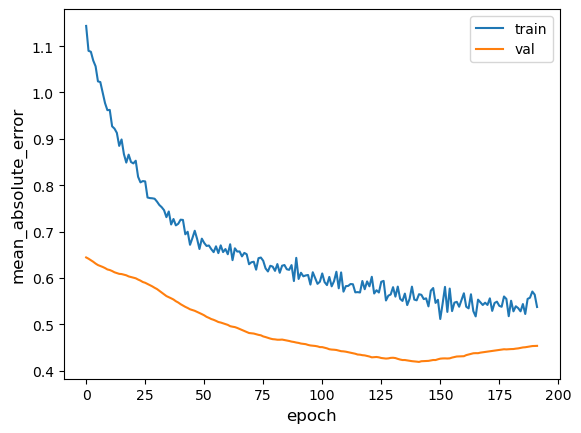

3/3 [==============================] - 0s 1ms/step - loss: 1.3199 - mean_absolute_error: 0.6680
Test accuracy 0.6680325269699097
Test loss 1.3199279308319092


In [35]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [36]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

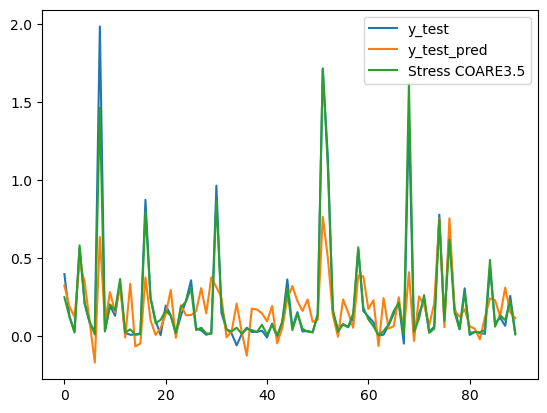

In [37]:
plt.plot(y_test.values, label='y_test')
plt.plot(y_test_pred, label='y_test_pred')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

In [38]:
rmse(y_test.values, y_test_pred)

0.3985692134551196

## Correlation

In [39]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.71389247],
       [0.71389247, 1.        ]])

In [40]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98281594],
       [0.98281594, 1.        ]])

In [41]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [42]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [43]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
7/7 [==============================] - 1s 16ms/step - loss: 5.1962 - mean_absolute_error: 1.7636 - val_loss: 2.6961 - val_mean_absolute_error: 1.2996
Epoch 2/500
7/7 [==============================] - 0s 4ms/step - loss: 5.1370 - mean_absolute_error: 1.7914 - val_loss: 2.5813 - val_mean_absolute_error: 1.2677
Epoch 3/500
7/7 [==============================] - 0s 4ms/step - loss: 5.1718 - mean_absolute_error: 1.7225 - val_loss: 2.4822 - val_mean_absolute_error: 1.2408
Epoch 4/500
7/7 [==============================] - 0s 4ms/step - loss: 4.7487 - mean_absolute_error: 1.6415 - val_loss: 2.3924 - val_mean_absolute_error: 1.2169
Epoch 5/500
7/7 [==============================] - 0s 4ms/step - loss: 4.8546 - mean_absolute_error: 1.6537 - val_loss: 2.3131 - val_mean_absolute_error: 1.1971
Epoch 6/500
7/7 [==============================] - 0s 4ms/step - loss: 4.3135 - mean_absolute_error: 1.5388 - val_loss: 2.2385 - val_mean_absolute_error: 1.1788
Epoch 7/500
7/7 [================

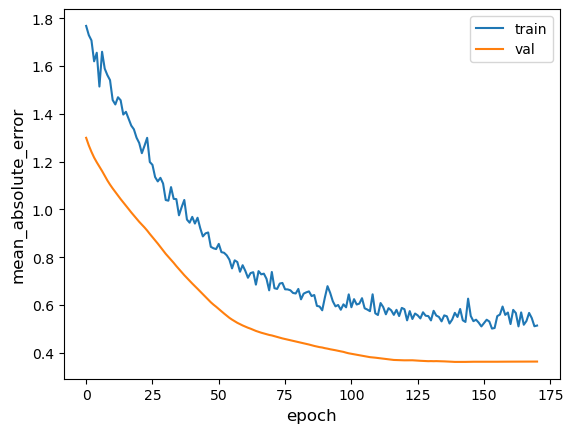

3/3 [==============================] - 0s 1ms/step - loss: 1.0907 - mean_absolute_error: 0.5681
Test accuracy 0.5680901408195496
Test loss 1.0907416343688965


In [44]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [45]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

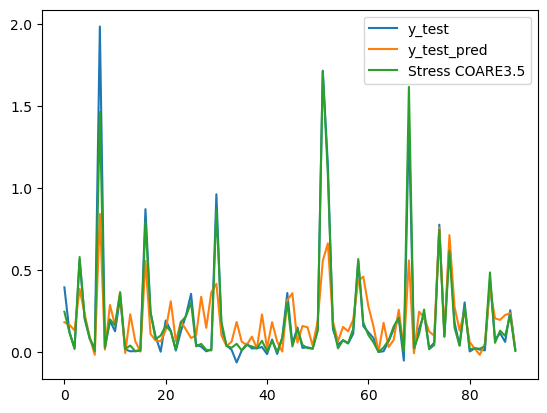

In [46]:
plt.plot(y_test.values, label='y_test')
plt.plot(y_test_pred, label='y_test_pred')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

In [47]:
rmse(y_test.values, y_test_pred)

0.39926746743703206

## Correlation

In [48]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.80039601],
       [0.80039601, 1.        ]])

In [49]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98281594],
       [0.98281594, 1.        ]])

In [50]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [51]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [52]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
7/7 [==============================] - 0s 17ms/step - loss: 1.9329 - mean_absolute_error: 0.9516 - val_loss: 2.0942 - val_mean_absolute_error: 1.2188
Epoch 2/500
7/7 [==============================] - 0s 4ms/step - loss: 1.7443 - mean_absolute_error: 0.9241 - val_loss: 1.9505 - val_mean_absolute_error: 1.1663
Epoch 3/500
7/7 [==============================] - 0s 4ms/step - loss: 1.7567 - mean_absolute_error: 0.9224 - val_loss: 1.8243 - val_mean_absolute_error: 1.1189
Epoch 4/500
7/7 [==============================] - 0s 4ms/step - loss: 1.7484 - mean_absolute_error: 0.9159 - val_loss: 1.7218 - val_mean_absolute_error: 1.0796
Epoch 5/500
7/7 [==============================] - 0s 4ms/step - loss: 1.8611 - mean_absolute_error: 0.9008 - val_loss: 1.6287 - val_mean_absolute_error: 1.0442
Epoch 6/500
7/7 [==============================] - 0s 4ms/step - loss: 1.4460 - mean_absolute_error: 0.8392 - val_loss: 1.5451 - val_mean_absolute_error: 1.0122
Epoch 7/500
7/7 [================

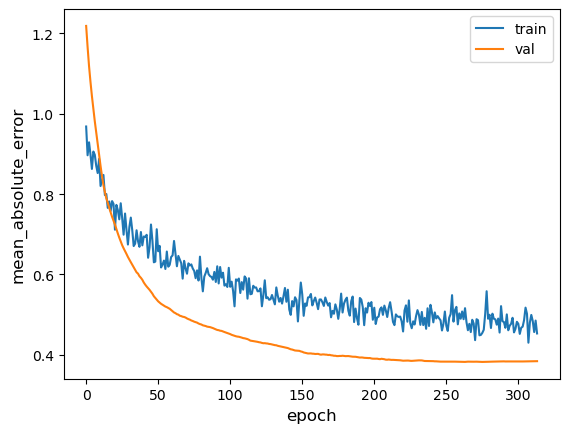

3/3 [==============================] - 0s 1ms/step - loss: 0.9496 - mean_absolute_error: 0.5449
Test accuracy 0.5448736548423767
Test loss 0.949554443359375


In [53]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [54]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

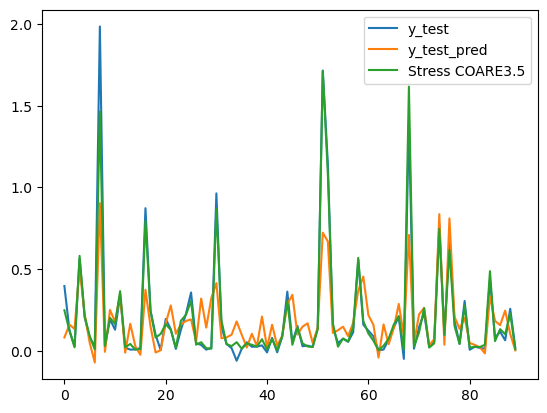

In [55]:
plt.plot(y_test.values, label='y_test')
plt.plot(y_test_pred, label='y_test_pred')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

In [56]:
rmse(y_test.values, y_test_pred)

0.40688492358702

## Correlation

In [57]:
y_test_pred.shape

(90, 1)

In [58]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.83244298],
       [0.83244298, 1.        ]])

In [59]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98281594],
       [0.98281594, 1.        ]])

In [60]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98281594],
       [0.98281594, 1.        ]])

### Best model!!!

In [61]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [62]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [63]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
7/7 [==============================] - 1s 22ms/step - loss: 2.6550 - mean_absolute_error: 1.1567 - val_loss: 0.7624 - val_mean_absolute_error: 0.6908
Epoch 2/500
7/7 [==============================] - 0s 5ms/step - loss: 1.9524 - mean_absolute_error: 1.0202 - val_loss: 0.7278 - val_mean_absolute_error: 0.6762
Epoch 3/500
7/7 [==============================] - 0s 4ms/step - loss: 2.0700 - mean_absolute_error: 1.0480 - val_loss: 0.6913 - val_mean_absolute_error: 0.6607
Epoch 4/500
7/7 [==============================] - 0s 4ms/step - loss: 1.8290 - mean_absolute_error: 0.9423 - val_loss: 0.6587 - val_mean_absolute_error: 0.6457
Epoch 5/500
7/7 [==============================] - 0s 4ms/step - loss: 1.3488 - mean_absolute_error: 0.8502 - val_loss: 0.6280 - val_mean_absolute_error: 0.6311
Epoch 6/500
7/7 [==============================] - 0s 4ms/step - loss: 1.4782 - mean_absolute_error: 0.8482 - val_loss: 0.6036 - val_mean_absolute_error: 0.6184
Epoch 7/500
7/7 [================

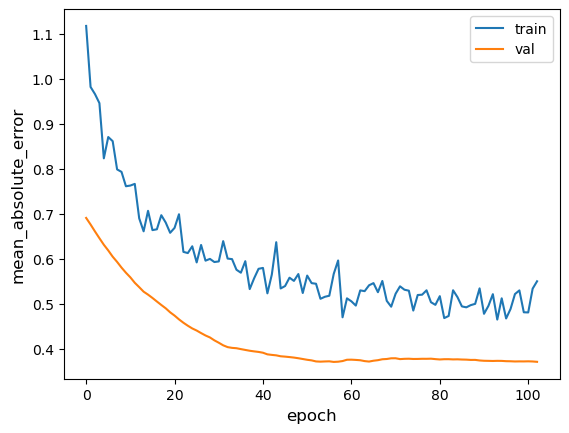

3/3 [==============================] - 0s 1ms/step - loss: 0.7614 - mean_absolute_error: 0.4833
Test accuracy 0.48334231972694397
Test loss 0.7614087462425232


In [64]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [65]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

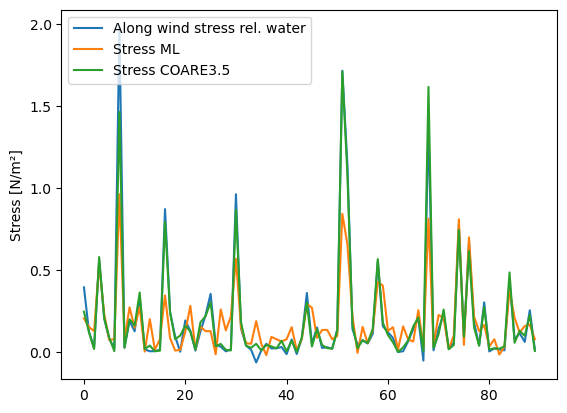

In [66]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [67]:
rmse(y_test.values, y_test_pred)

0.40930402651001796

In [68]:
rmse(y_test.values, c_test.values)

0.06884559918794826

In [69]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.89438635],
       [0.89438635, 1.        ]])

In [70]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98281594],
       [0.98281594, 1.        ]])

Text(0, 0.5, 'Stress ML [N/m²]')

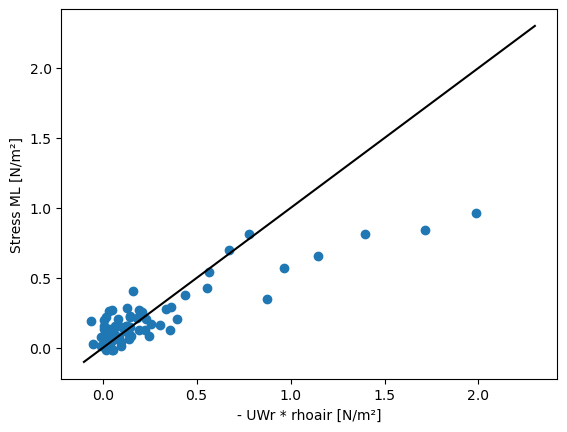

In [71]:
plt.scatter(y_test, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [72]:
OUT_STEPS = 1
num_features = 1
batch_size =256
epochs=500

metric = 'mean_absolute_error'

In [73]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [74]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
1/1 [==============================] - 1s 571ms/step - loss: 2.9437 - mean_absolute_error: 1.2295 - val_loss: 0.7593 - val_mean_absolute_error: 0.7559
Epoch 2/500
1/1 [==============================] - 0s 22ms/step - loss: 2.5420 - mean_absolute_error: 1.0918 - val_loss: 0.7433 - val_mean_absolute_error: 0.7493
Epoch 3/500
1/1 [==============================] - 0s 22ms/step - loss: 2.4677 - mean_absolute_error: 1.0995 - val_loss: 0.7285 - val_mean_absolute_error: 0.7427
Epoch 4/500
1/1 [==============================] - 0s 22ms/step - loss: 2.0236 - mean_absolute_error: 0.9991 - val_loss: 0.7154 - val_mean_absolute_error: 0.7368
Epoch 5/500
1/1 [==============================] - 0s 22ms/step - loss: 1.7565 - mean_absolute_error: 0.9448 - val_loss: 0.7034 - val_mean_absolute_error: 0.7313
Epoch 6/500
1/1 [==============================] - 0s 22ms/step - loss: 1.5690 - mean_absolute_error: 0.9100 - val_loss: 0.6918 - val_mean_absolute_error: 0.7255
Epoch 7/500
1/1 [==========

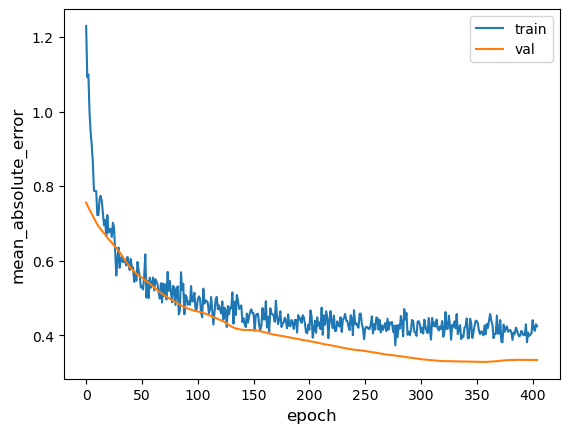

3/3 [==============================] - 0s 935us/step - loss: 0.8573 - mean_absolute_error: 0.4856
Test accuracy 0.48560434579849243
Test loss 0.8572759032249451


In [75]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [76]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

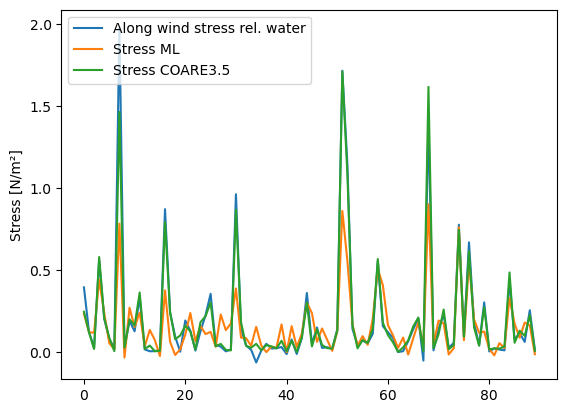

In [77]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [78]:
rmse(y_test.values, y_test_pred)

0.4057675247714745

In [79]:
rmse(y_test.values, c_test.values)

0.06884559918794826

In [80]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.88494163],
       [0.88494163, 1.        ]])

In [81]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98281594],
       [0.98281594, 1.        ]])

Text(0, 0.5, 'Stress ML [N/m²]')

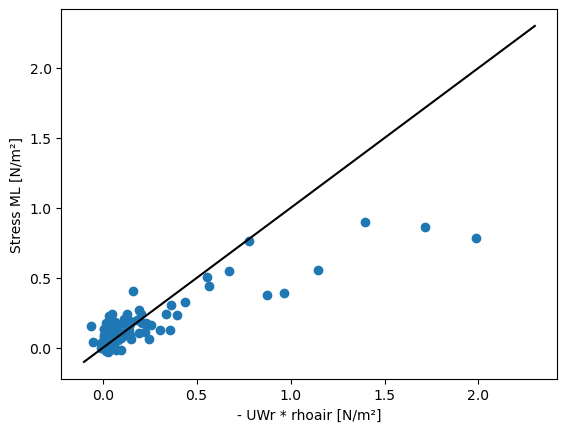

In [82]:
plt.scatter(y_test, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

#### Very unstable - get different results every time I run it

In [83]:
OUT_STEPS = 1
num_features = 1
batch_size =256
epochs=500

metric = 'mean_absolute_error'

In [84]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [89]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
1/1 [==============================] - 1s 710ms/step - loss: 2.1927 - mean_absolute_error: 1.1134 - val_loss: 0.6187 - val_mean_absolute_error: 0.6775
Epoch 2/500
1/1 [==============================] - 0s 29ms/step - loss: 1.5948 - mean_absolute_error: 0.9684 - val_loss: 0.5991 - val_mean_absolute_error: 0.6686
Epoch 3/500
1/1 [==============================] - 0s 28ms/step - loss: 1.1503 - mean_absolute_error: 0.8317 - val_loss: 0.5951 - val_mean_absolute_error: 0.6678
Epoch 4/500
1/1 [==============================] - 0s 28ms/step - loss: 1.0676 - mean_absolute_error: 0.8119 - val_loss: 0.5953 - val_mean_absolute_error: 0.6692
Epoch 5/500
1/1 [==============================] - 0s 27ms/step - loss: 0.8573 - mean_absolute_error: 0.6963 - val_loss: 0.5945 - val_mean_absolute_error: 0.6698
Epoch 6/500
1/1 [==============================] - 0s 27ms/step - loss: 0.8249 - mean_absolute_error: 0.7099 - val_loss: 0.5916 - val_mean_absolute_error: 0.6686
Epoch 7/500
1/1 [==========

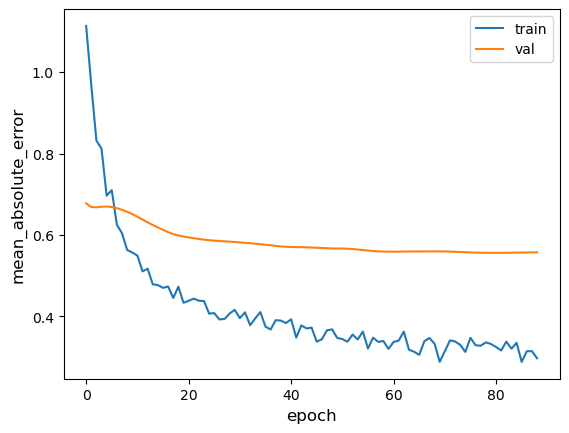

3/3 [==============================] - 0s 1ms/step - loss: 2.1342 - mean_absolute_error: 0.7971
Test accuracy 0.7970796227455139
Test loss 2.1341986656188965


In [92]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [93]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

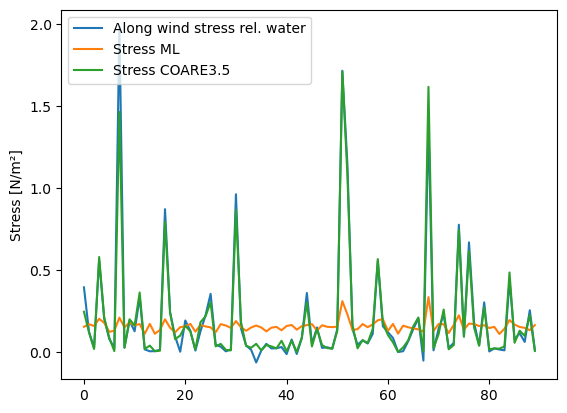

In [94]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [95]:
rmse(y_test.values, y_test_pred)

0.36030559085762837

In [96]:
rmse(y_test.values, c_test.values)

0.06884559918794826

In [97]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.       , 0.7713097],
       [0.7713097, 1.       ]])

In [98]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98281594],
       [0.98281594, 1.        ]])

# __________________________________________________

# Using only s0_norm

In [13]:
predictor_variables = ['s0_norm', 'u10', 'v10']

In [14]:
x = df[predictor_variables]
x

s0_norm       u10        v10
300 -14.918911  6.045154   7.037160
381  -8.355029  8.021218  -1.367607
108  -9.694715 -5.669697  -2.507397
94   -6.935540  6.495847  11.473030
289 -11.330360  6.045154   7.037160
..         ...       ...        ...
293  -9.551195  6.045154   7.037160
235  -8.971364  2.151350  -7.729190
84   -7.685976  3.966743  -7.637461
95   -9.699736  7.627155   2.237181
215 -10.245456 -0.009023   1.070539

[410 rows x 3 columns]

In [15]:
y = -  df['UWr'] * df['rhoair']
y

300   -0.003707
381    0.124103
108    0.083250
94     0.229089
289    0.130489
         ...   
293    0.079242
235    0.116743
84     0.063755
95     0.256668
215    0.016093
Length: 410, dtype: float64

NaNs: 

2018-12-04 11:10:59.993607         NaN

2018-12-16 23:11:59.981755         NaN

In [16]:
x_train = x[:split_idx]
x_test = x[split_idx:]

In [17]:
y_train = y[:split_idx]
y_test = y[split_idx:]

In [18]:
# Compute average and std of the training data
x_train_mean = np.nanmean(x_train, axis=0)
x_train_std = np.nanstd(x_train, axis=0)

y_train_mean = np.nanmean(y_train, axis=0)
y_train_std = np.nanstd(y_train,axis=0)

# Normalize
x_train_norm = (x_train - x_train_mean) / x_train_std
x_test_norm = (x_test - x_train_mean) / x_train_std
y_train_norm = (y_train - y_train_mean) / y_train_std
y_test_norm = (y_test - y_train_mean) / y_train_std

# ML setup

In [105]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [106]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

# First experiment - Linear regression

In [107]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    #tf.keras.layers.Dense(16, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
7/7 [==============================] - 0s 16ms/step - loss: 2.2615 - mean_absolute_error: 1.1214 - val_loss: 1.2638 - val_mean_absolute_error: 0.9026
Epoch 2/500
7/7 [==============================] - 0s 4ms/step - loss: 2.1138 - mean_absolute_error: 1.0868 - val_loss: 1.2509 - val_mean_absolute_error: 0.8981
Epoch 3/500
7/7 [==============================] - 0s 4ms/step - loss: 1.8798 - mean_absolute_error: 1.0601 - val_loss: 1.2385 - val_mean_absolute_error: 0.8939
Epoch 4/500
7/7 [==============================] - 0s 4ms/step - loss: 1.6042 - mean_absolute_error: 1.0030 - val_loss: 1.2256 - val_mean_absolute_error: 0.8894
Epoch 5/500
7/7 [==============================] - 0s 4ms/step - loss: 1.7298 - mean_absolute_error: 1.0273 - val_loss: 1.2124 - val_mean_absolute_error: 0.8847
Epoch 6/500
7/7 [==============================] - 0s 4ms/step - loss: 1.7163 - mean_absolute_error: 1.0085 - val_loss: 1.2000 - val_mean_absolute_error: 0.8804
Epoch 7/500
7/7 [================

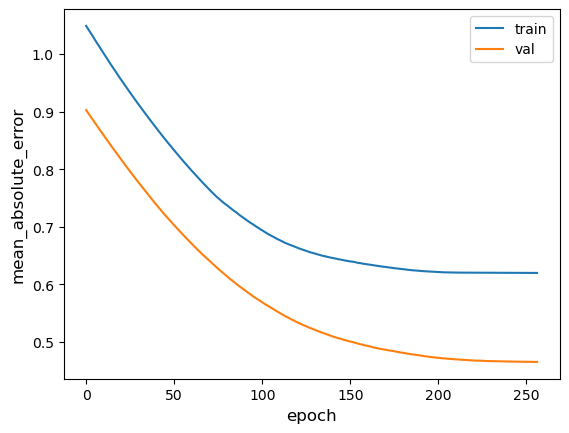

3/3 [==============================] - 0s 3ms/step - loss: 1.5576 - mean_absolute_error: 0.7492
Test accuracy 0.7492129802703857
Test loss 1.557582974433899


In [108]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [109]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [110]:
np.mean(y_test)

0.20288953337977453

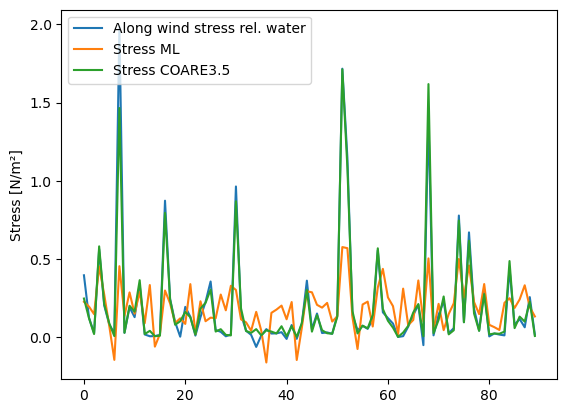

In [111]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [112]:
rmse(y_test.values, y_test_pred)

0.3850346037818792

In [113]:
rmse(y_test.values, c_test)

0.06884559918794826

In [114]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.64905025],
       [0.64905025, 1.        ]])

In [115]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98281594],
       [0.98281594, 1.        ]])

# Other experiments

In [116]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [117]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [118]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
7/7 [==============================] - 0s 17ms/step - loss: 2.7755 - mean_absolute_error: 1.2514 - val_loss: 1.1901 - val_mean_absolute_error: 0.7828
Epoch 2/500
7/7 [==============================] - 0s 4ms/step - loss: 2.0948 - mean_absolute_error: 1.0900 - val_loss: 1.1746 - val_mean_absolute_error: 0.7787
Epoch 3/500
7/7 [==============================] - 0s 4ms/step - loss: 2.2071 - mean_absolute_error: 1.1187 - val_loss: 1.1581 - val_mean_absolute_error: 0.7740
Epoch 4/500
7/7 [==============================] - 0s 4ms/step - loss: 2.2961 - mean_absolute_error: 1.1411 - val_loss: 1.1404 - val_mean_absolute_error: 0.7684
Epoch 5/500
7/7 [==============================] - 0s 4ms/step - loss: 1.9731 - mean_absolute_error: 1.0786 - val_loss: 1.1245 - val_mean_absolute_error: 0.7627
Epoch 6/500
7/7 [==============================] - 0s 4ms/step - loss: 2.0116 - mean_absolute_error: 1.0975 - val_loss: 1.1081 - val_mean_absolute_error: 0.7569
Epoch 7/500
7/7 [================

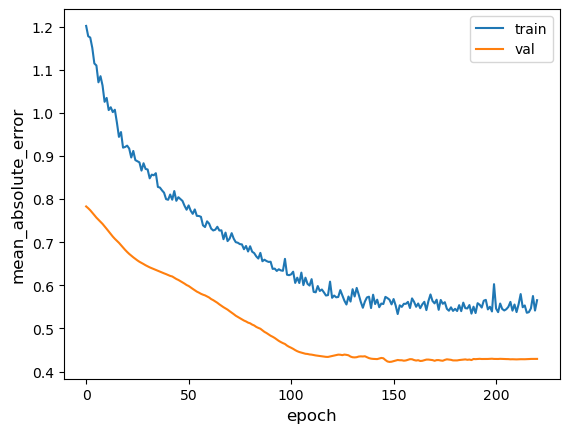

3/3 [==============================] - 0s 1ms/step - loss: 1.0046 - mean_absolute_error: 0.6508
Test accuracy 0.6507762670516968
Test loss 1.0046486854553223


In [119]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [120]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

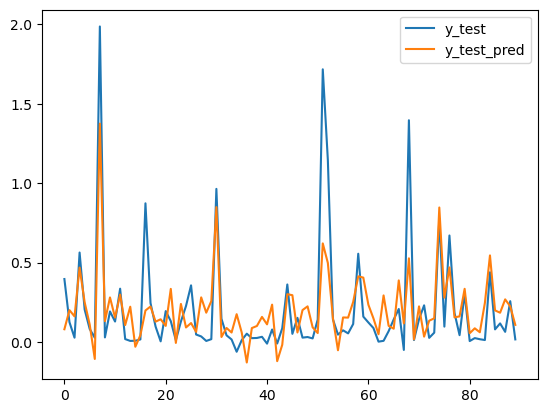

In [121]:
plt.plot(y_test.values, label='y_test')
plt.plot(y_test_pred, label='y_test_pred')
plt.legend()

In [122]:
rmse(y_test.values, y_test_pred)

0.4150701777692118

In [123]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.79098022],
       [0.79098022, 1.        ]])

In [124]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98281594],
       [0.98281594, 1.        ]])

Text(0, 0.5, 'Stress ML [N/m²]')

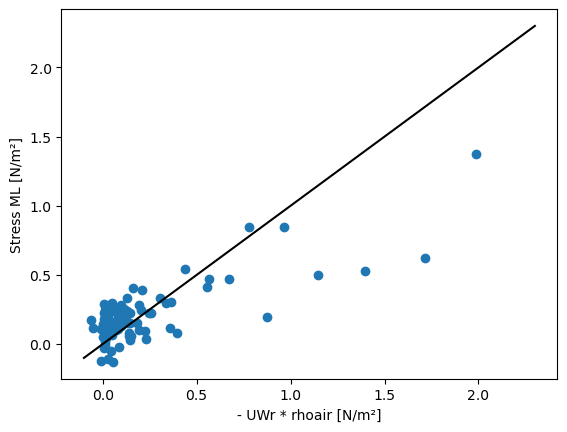

In [125]:
plt.scatter(y_test, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [126]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [127]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [130]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
7/7 [==============================] - 0s 17ms/step - loss: 5.6017 - mean_absolute_error: 1.8328 - val_loss: 1.5366 - val_mean_absolute_error: 1.0540
Epoch 2/500
7/7 [==============================] - 0s 4ms/step - loss: 5.6084 - mean_absolute_error: 1.8002 - val_loss: 1.5179 - val_mean_absolute_error: 1.0498
Epoch 3/500
7/7 [==============================] - 0s 4ms/step - loss: 5.4595 - mean_absolute_error: 1.8258 - val_loss: 1.4994 - val_mean_absolute_error: 1.0447
Epoch 4/500
7/7 [==============================] - 0s 4ms/step - loss: 5.2701 - mean_absolute_error: 1.8162 - val_loss: 1.4780 - val_mean_absolute_error: 1.0380
Epoch 5/500
7/7 [==============================] - 0s 4ms/step - loss: 4.7123 - mean_absolute_error: 1.7020 - val_loss: 1.4550 - val_mean_absolute_error: 1.0304
Epoch 6/500
7/7 [==============================] - 0s 4ms/step - loss: 4.6914 - mean_absolute_error: 1.7404 - val_loss: 1.4334 - val_mean_absolute_error: 1.0230
Epoch 7/500
7/7 [================

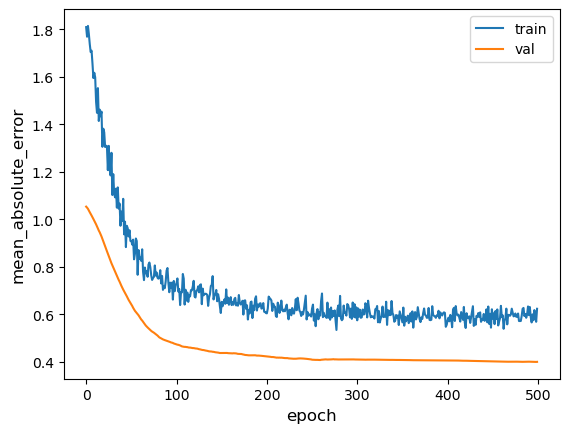

3/3 [==============================] - 0s 1ms/step - loss: 1.0658 - mean_absolute_error: 0.5975
Test accuracy 0.5974531173706055
Test loss 1.065780758857727


In [134]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [135]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

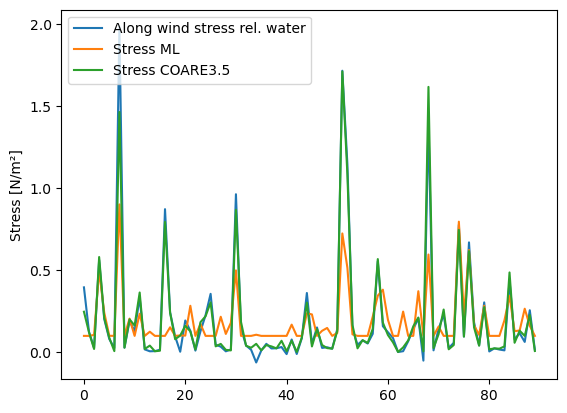

In [136]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [137]:
rmse(y_test.values, y_test_pred)

0.39201444014431913

In [138]:
rmse(c_test.values, y_test.values)

0.06884559918794826

In [139]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.84588671],
       [0.84588671, 1.        ]])

In [140]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98281594],
       [0.98281594, 1.        ]])

Text(0, 0.5, 'Stress ML [N/m²]')

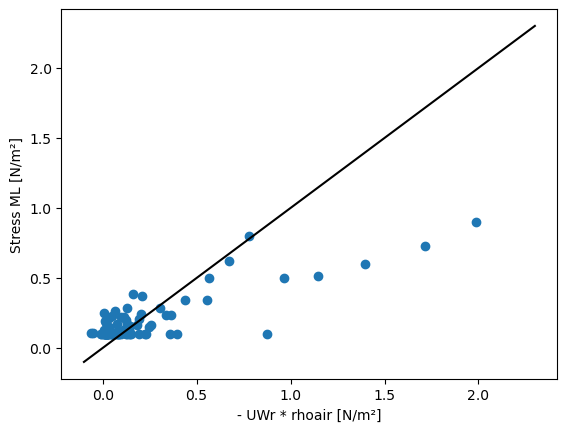

In [141]:
plt.scatter(y_test, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [142]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [143]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [144]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
7/7 [==============================] - 0s 18ms/step - loss: 1.4708 - mean_absolute_error: 0.9082 - val_loss: 0.5775 - val_mean_absolute_error: 0.6346
Epoch 2/500
7/7 [==============================] - 0s 4ms/step - loss: 1.3542 - mean_absolute_error: 0.8970 - val_loss: 0.5646 - val_mean_absolute_error: 0.6262
Epoch 3/500
7/7 [==============================] - 0s 4ms/step - loss: 1.3339 - mean_absolute_error: 0.8717 - val_loss: 0.5507 - val_mean_absolute_error: 0.6168
Epoch 4/500
7/7 [==============================] - 0s 4ms/step - loss: 1.3253 - mean_absolute_error: 0.8460 - val_loss: 0.5373 - val_mean_absolute_error: 0.6073
Epoch 5/500
7/7 [==============================] - 0s 4ms/step - loss: 1.3735 - mean_absolute_error: 0.8747 - val_loss: 0.5256 - val_mean_absolute_error: 0.5989
Epoch 6/500
7/7 [==============================] - 0s 4ms/step - loss: 1.3172 - mean_absolute_error: 0.8757 - val_loss: 0.5152 - val_mean_absolute_error: 0.5912
Epoch 7/500
7/7 [================

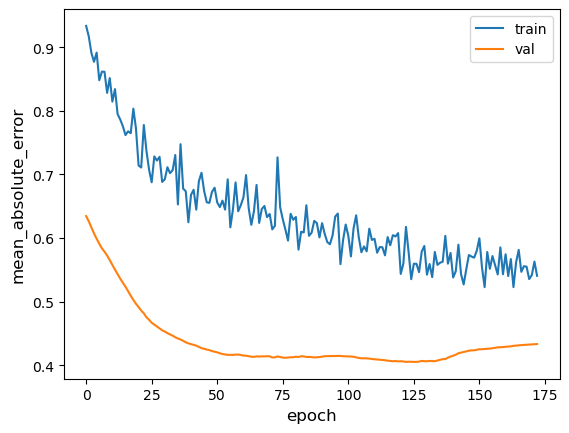

3/3 [==============================] - 0s 1ms/step - loss: 1.1747 - mean_absolute_error: 0.6026
Test accuracy 0.6025972366333008
Test loss 1.174744725227356


In [145]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [147]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

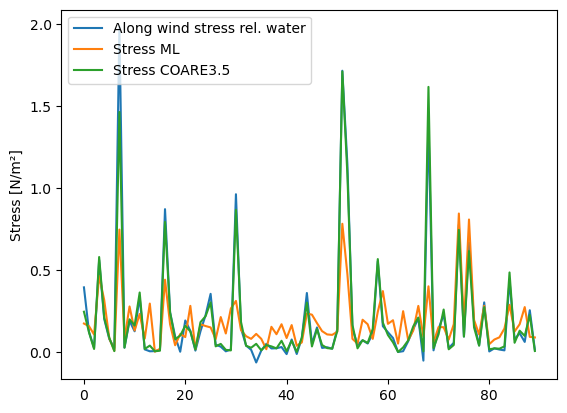

In [148]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [149]:
rmse(y_test.values, y_test_pred)

0.39304230205114277

In [150]:
rmse(c_test.values, y_test.values)

0.06884559918794826

In [151]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.79280784],
       [0.79280784, 1.        ]])

In [152]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98281594],
       [0.98281594, 1.        ]])

Text(0, 0.5, 'Stress ML [N/m²]')

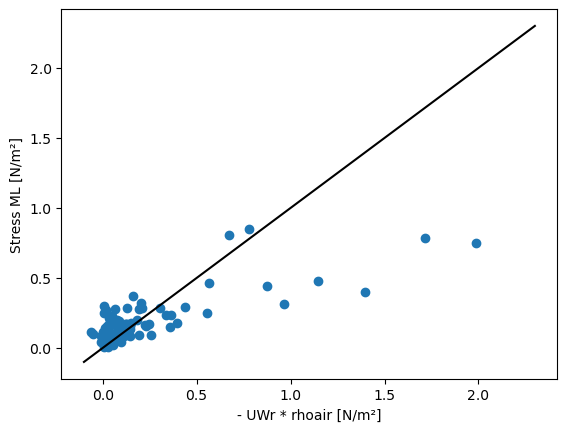

In [153]:
plt.scatter(y_test, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [154]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [155]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [157]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
14/14 [==============================] - 1s 8ms/step - loss: 2.7340 - mean_absolute_error: 1.2321 - val_loss: 1.3133 - val_mean_absolute_error: 0.8283
Epoch 2/500
14/14 [==============================] - 0s 2ms/step - loss: 2.4204 - mean_absolute_error: 1.1873 - val_loss: 1.2314 - val_mean_absolute_error: 0.7997
Epoch 3/500
14/14 [==============================] - 0s 2ms/step - loss: 2.1901 - mean_absolute_error: 1.1604 - val_loss: 1.1611 - val_mean_absolute_error: 0.7759
Epoch 4/500
14/14 [==============================] - 0s 2ms/step - loss: 2.2054 - mean_absolute_error: 1.1550 - val_loss: 1.1139 - val_mean_absolute_error: 0.7622
Epoch 5/500
14/14 [==============================] - 0s 2ms/step - loss: 1.9485 - mean_absolute_error: 1.1229 - val_loss: 1.0837 - val_mean_absolute_error: 0.7584
Epoch 6/500
14/14 [==============================] - 0s 2ms/step - loss: 1.8947 - mean_absolute_error: 1.0899 - val_loss: 1.0551 - val_mean_absolute_error: 0.7557
Epoch 7/500
14/14 [===

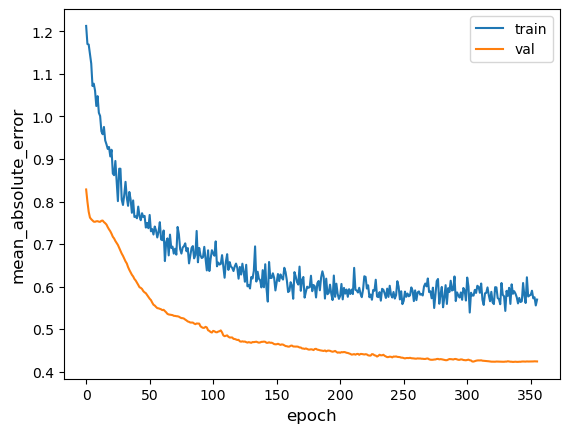

3/3 [==============================] - 0s 1ms/step - loss: 0.9780 - mean_absolute_error: 0.6311
Test accuracy 0.6311259269714355
Test loss 0.9779597520828247


In [158]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [159]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

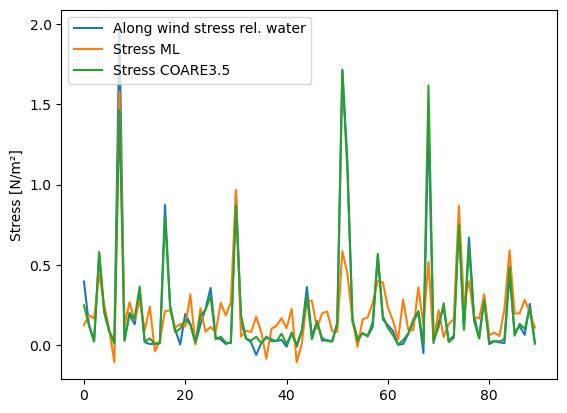

In [160]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [161]:
rmse(y_test.values, y_test_pred)

0.421365122537687

In [162]:
rmse(y_test.values, c_test)

0.06884559918794826

In [163]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.79038121],
       [0.79038121, 1.        ]])

In [164]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98281594],
       [0.98281594, 1.        ]])

Text(0, 0.5, 'Stress ML [N/m²]')

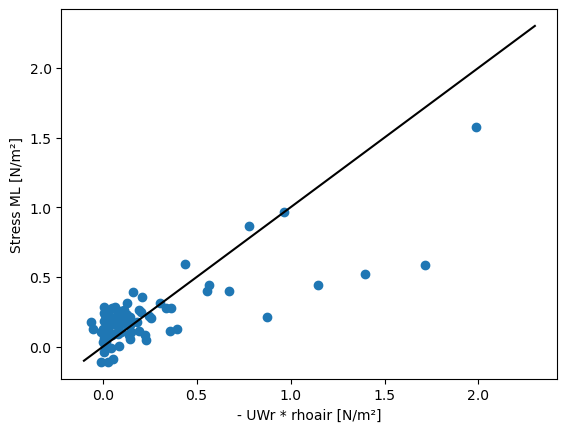

In [165]:
plt.scatter(y_test, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [166]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [167]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [168]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
7/7 [==============================] - 0s 17ms/step - loss: 2.4868 - mean_absolute_error: 1.2076 - val_loss: 1.2493 - val_mean_absolute_error: 0.9482
Epoch 2/500
7/7 [==============================] - 0s 4ms/step - loss: 2.2698 - mean_absolute_error: 1.1812 - val_loss: 1.1701 - val_mean_absolute_error: 0.9166
Epoch 3/500
7/7 [==============================] - 0s 4ms/step - loss: 1.9444 - mean_absolute_error: 1.0429 - val_loss: 1.0918 - val_mean_absolute_error: 0.8829
Epoch 4/500
7/7 [==============================] - 0s 4ms/step - loss: 2.1091 - mean_absolute_error: 1.1016 - val_loss: 1.0155 - val_mean_absolute_error: 0.8486
Epoch 5/500
7/7 [==============================] - 0s 4ms/step - loss: 1.8353 - mean_absolute_error: 0.9793 - val_loss: 0.9586 - val_mean_absolute_error: 0.8218
Epoch 6/500
7/7 [==============================] - 0s 4ms/step - loss: 1.5085 - mean_absolute_error: 0.9258 - val_loss: 0.9050 - val_mean_absolute_error: 0.7951
Epoch 7/500
7/7 [================

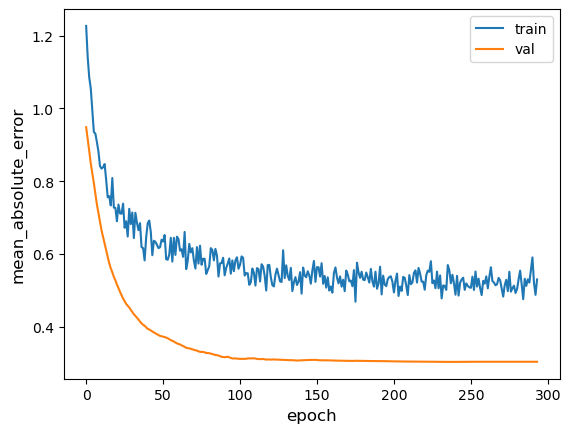

3/3 [==============================] - 0s 1ms/step - loss: 0.9794 - mean_absolute_error: 0.5410
Test accuracy 0.541026771068573
Test loss 0.9793899655342102


In [169]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [170]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

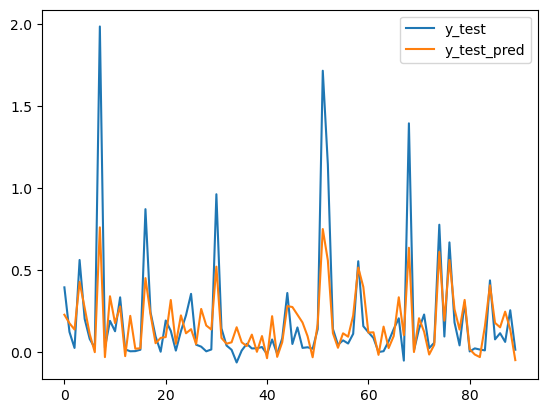

In [171]:
plt.plot(y_test.values, label='y_test')
plt.plot(y_test_pred, label='y_test_pred')
plt.legend()

In [172]:
rmse(y_test.values, y_test_pred)

0.39910097103734826

In [173]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.       , 0.8519043],
       [0.8519043, 1.       ]])

In [174]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98281594],
       [0.98281594, 1.        ]])

Text(0, 0.5, 'Stress ML [N/m²]')

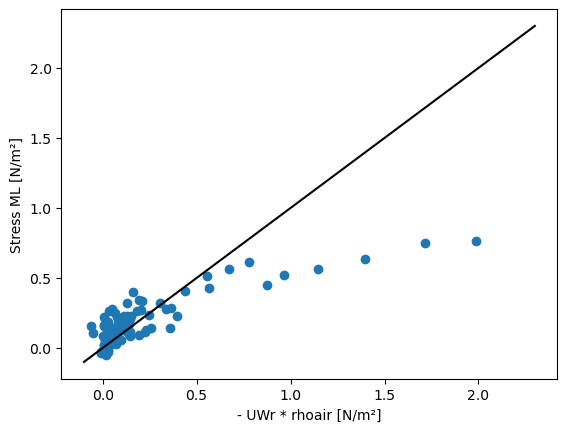

In [175]:
plt.scatter(y_test, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [176]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [177]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [178]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
7/7 [==============================] - 1s 22ms/step - loss: 7.7212 - mean_absolute_error: 2.0275 - val_loss: 3.0921 - val_mean_absolute_error: 1.2578
Epoch 2/500
7/7 [==============================] - 0s 5ms/step - loss: 7.2210 - mean_absolute_error: 2.0163 - val_loss: 2.8744 - val_mean_absolute_error: 1.2012
Epoch 3/500
7/7 [==============================] - 0s 4ms/step - loss: 6.1310 - mean_absolute_error: 1.9871 - val_loss: 2.7050 - val_mean_absolute_error: 1.1546
Epoch 4/500
7/7 [==============================] - 0s 4ms/step - loss: 7.7508 - mean_absolute_error: 2.0410 - val_loss: 2.5456 - val_mean_absolute_error: 1.1142
Epoch 5/500
7/7 [==============================] - 0s 4ms/step - loss: 7.6721 - mean_absolute_error: 1.8762 - val_loss: 2.4478 - val_mean_absolute_error: 1.0902
Epoch 6/500
7/7 [==============================] - 0s 4ms/step - loss: 6.0488 - mean_absolute_error: 1.8698 - val_loss: 2.3499 - val_mean_absolute_error: 1.0683
Epoch 7/500
7/7 [================

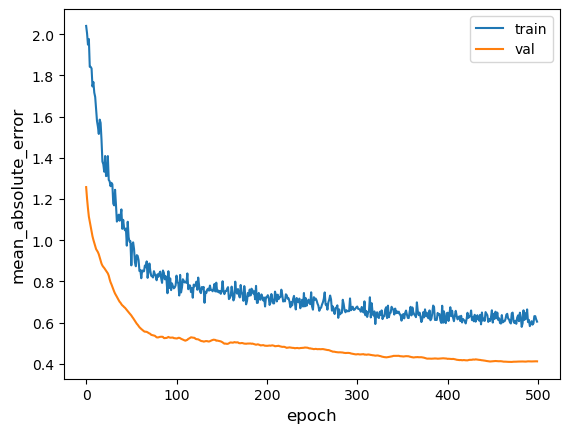

3/3 [==============================] - 0s 2ms/step - loss: 1.4583 - mean_absolute_error: 0.6491
Test accuracy 0.6490649580955505
Test loss 1.4583134651184082


In [179]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [180]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

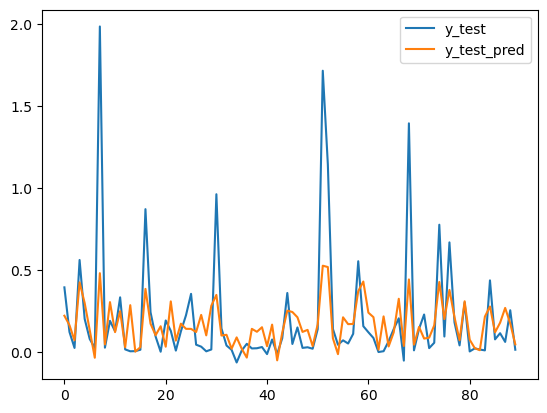

In [181]:
plt.plot(y_test.values, label='y_test')
plt.plot(y_test_pred, label='y_test_pred')
plt.legend()

In [182]:
rmse(y_test.values, y_test_pred)

0.3809294138667587

In [183]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.73912716],
       [0.73912716, 1.        ]])

In [184]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98281594],
       [0.98281594, 1.        ]])

Text(0, 0.5, 'Stress ML [N/m²]')

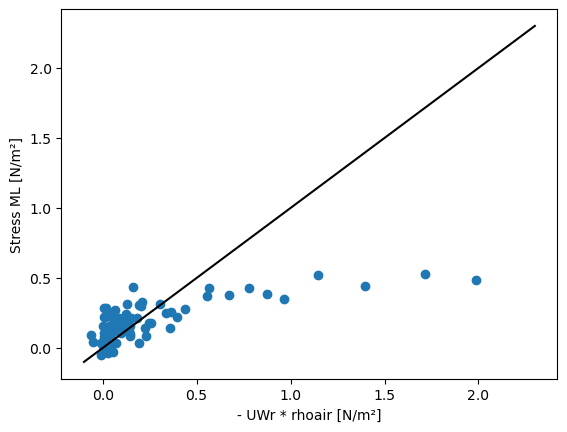

In [185]:
plt.scatter(y_test, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [186]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [187]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [188]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
14/14 [==============================] - 1s 11ms/step - loss: 2.2662 - mean_absolute_error: 1.0668 - val_loss: 0.5514 - val_mean_absolute_error: 0.6023
Epoch 2/500
14/14 [==============================] - 0s 3ms/step - loss: 1.4364 - mean_absolute_error: 0.9562 - val_loss: 0.5368 - val_mean_absolute_error: 0.5919
Epoch 3/500
14/14 [==============================] - 0s 3ms/step - loss: 1.6358 - mean_absolute_error: 0.9662 - val_loss: 0.5164 - val_mean_absolute_error: 0.5814
Epoch 4/500
14/14 [==============================] - 0s 3ms/step - loss: 1.1384 - mean_absolute_error: 0.7975 - val_loss: 0.4993 - val_mean_absolute_error: 0.5729
Epoch 5/500
14/14 [==============================] - 0s 3ms/step - loss: 1.4652 - mean_absolute_error: 0.9391 - val_loss: 0.4858 - val_mean_absolute_error: 0.5651
Epoch 6/500
14/14 [==============================] - 0s 3ms/step - loss: 1.3609 - mean_absolute_error: 0.8624 - val_loss: 0.4747 - val_mean_absolute_error: 0.5591
Epoch 7/500
14/14 [==

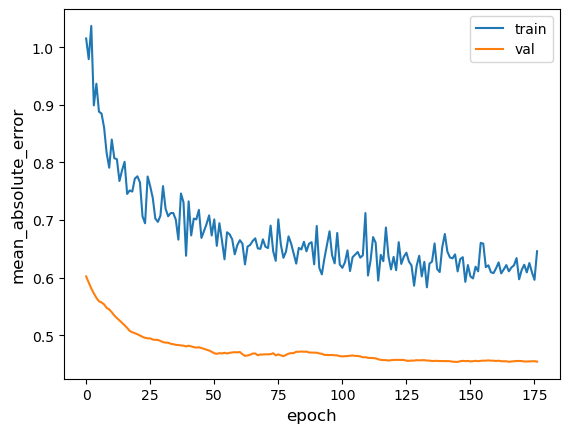

3/3 [==============================] - 0s 1ms/step - loss: 1.1425 - mean_absolute_error: 0.6302
Test accuracy 0.6301606297492981
Test loss 1.1424976587295532


In [189]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [190]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

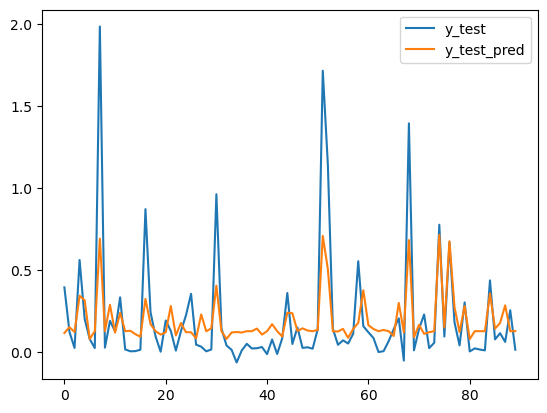

In [191]:
plt.plot(y_test.values, label='y_test')
plt.plot(y_test_pred, label='y_test_pred')
plt.legend()

In [192]:
rmse(y_test.values, y_test_pred)

0.38493596077361647

In [193]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.85555112],
       [0.85555112, 1.        ]])

In [194]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98281594],
       [0.98281594, 1.        ]])

In [195]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [196]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [197]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
14/14 [==============================] - 1s 11ms/step - loss: 3.4602 - mean_absolute_error: 1.5126 - val_loss: 1.6812 - val_mean_absolute_error: 0.9101
Epoch 2/500
14/14 [==============================] - 0s 3ms/step - loss: 4.9809 - mean_absolute_error: 1.6899 - val_loss: 1.5499 - val_mean_absolute_error: 0.8741
Epoch 3/500
14/14 [==============================] - 0s 3ms/step - loss: 3.1279 - mean_absolute_error: 1.2856 - val_loss: 1.4537 - val_mean_absolute_error: 0.8482
Epoch 4/500
14/14 [==============================] - 0s 3ms/step - loss: 3.4302 - mean_absolute_error: 1.4405 - val_loss: 1.3907 - val_mean_absolute_error: 0.8389
Epoch 5/500
14/14 [==============================] - 0s 3ms/step - loss: 3.5724 - mean_absolute_error: 1.4414 - val_loss: 1.3212 - val_mean_absolute_error: 0.8312
Epoch 6/500
14/14 [==============================] - 0s 3ms/step - loss: 3.1760 - mean_absolute_error: 1.3666 - val_loss: 1.2681 - val_mean_absolute_error: 0.8293
Epoch 7/500
14/14 [==

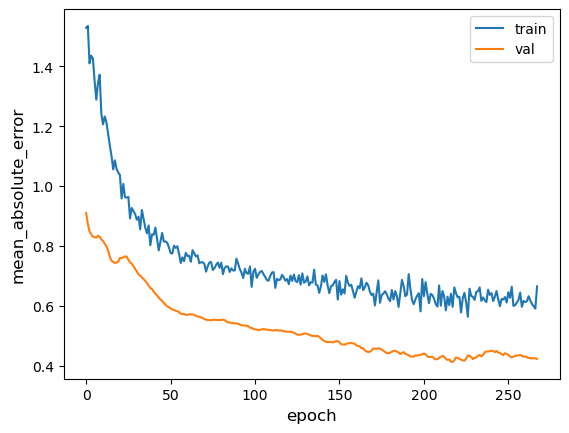

3/3 [==============================] - 0s 2ms/step - loss: 1.2098 - mean_absolute_error: 0.6403
Test accuracy 0.6402633786201477
Test loss 1.209818720817566


In [198]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [200]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

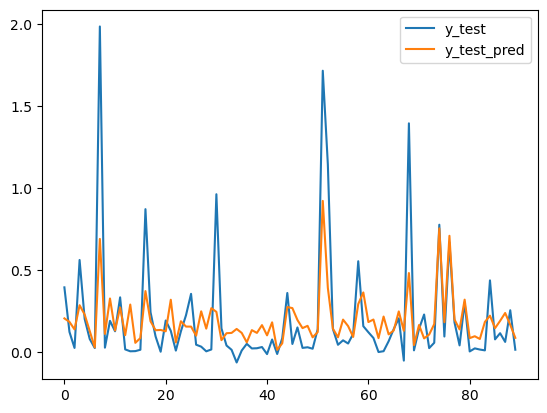

In [201]:
plt.plot(y_test.values, label='y_test')
plt.plot(y_test_pred, label='y_test_pred')
plt.legend()

In [202]:
rmse(y_test.values, y_test_pred)

0.3872203959200525

In [203]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.80549459],
       [0.80549459, 1.        ]])

In [204]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98281594],
       [0.98281594, 1.        ]])

In [205]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [206]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [207]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
14/14 [==============================] - 0s 9ms/step - loss: 4.4387 - mean_absolute_error: 1.6430 - val_loss: 0.6064 - val_mean_absolute_error: 0.5827
Epoch 2/500
14/14 [==============================] - 0s 2ms/step - loss: 3.2157 - mean_absolute_error: 1.3975 - val_loss: 0.5774 - val_mean_absolute_error: 0.5739
Epoch 3/500
14/14 [==============================] - 0s 2ms/step - loss: 2.3549 - mean_absolute_error: 1.2235 - val_loss: 0.5538 - val_mean_absolute_error: 0.5637
Epoch 4/500
14/14 [==============================] - 0s 2ms/step - loss: 2.1715 - mean_absolute_error: 1.0880 - val_loss: 0.5356 - val_mean_absolute_error: 0.5624
Epoch 5/500
14/14 [==============================] - 0s 2ms/step - loss: 1.9973 - mean_absolute_error: 1.0563 - val_loss: 0.5225 - val_mean_absolute_error: 0.5612
Epoch 6/500
14/14 [==============================] - 0s 2ms/step - loss: 1.8001 - mean_absolute_error: 1.0485 - val_loss: 0.5117 - val_mean_absolute_error: 0.5605
Epoch 7/500
14/14 [===

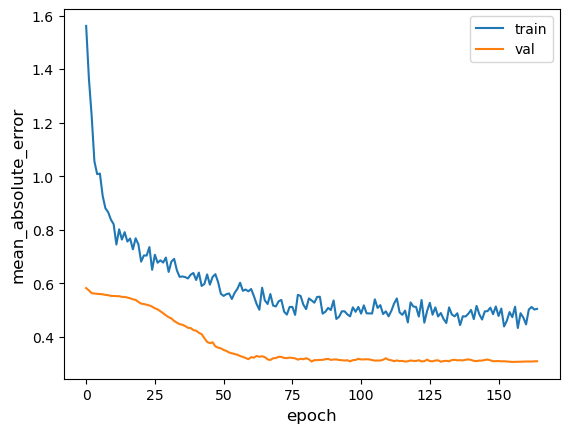

3/3 [==============================] - 0s 1ms/step - loss: 0.7604 - mean_absolute_error: 0.5040
Test accuracy 0.5039506554603577
Test loss 0.7603846788406372


In [208]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [209]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

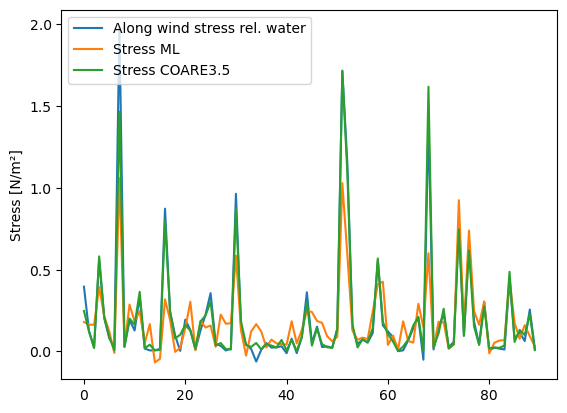

In [210]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [211]:
rmse(y_test.values, y_test_pred)

0.41420441157956367

In [212]:
rmse(y_test.values, c_test.values)

0.06884559918794826

In [213]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.87980442],
       [0.87980442, 1.        ]])

In [214]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98281594],
       [0.98281594, 1.        ]])

Text(0, 0.5, 'Stress ML [N/m²]')

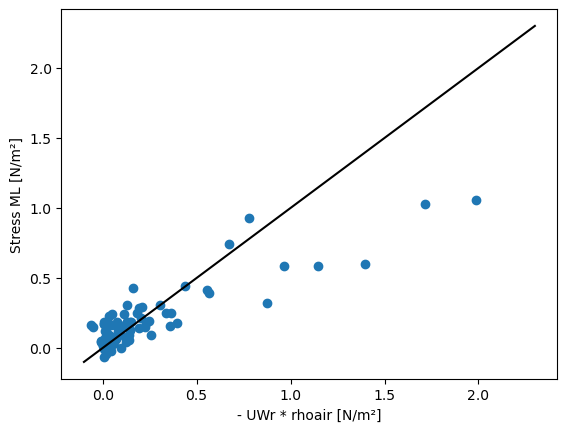

In [215]:
plt.scatter(y_test, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [216]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [217]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [218]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
14/14 [==============================] - 1s 10ms/step - loss: 3.8017 - mean_absolute_error: 1.6225 - val_loss: 0.9210 - val_mean_absolute_error: 0.6921
Epoch 2/500
14/14 [==============================] - 0s 3ms/step - loss: 3.3885 - mean_absolute_error: 1.4248 - val_loss: 0.8117 - val_mean_absolute_error: 0.6669
Epoch 3/500
14/14 [==============================] - 0s 2ms/step - loss: 3.1574 - mean_absolute_error: 1.4398 - val_loss: 0.7368 - val_mean_absolute_error: 0.6531
Epoch 4/500
14/14 [==============================] - 0s 2ms/step - loss: 2.6704 - mean_absolute_error: 1.3027 - val_loss: 0.7037 - val_mean_absolute_error: 0.6512
Epoch 5/500
14/14 [==============================] - 0s 2ms/step - loss: 2.1691 - mean_absolute_error: 1.1835 - val_loss: 0.6867 - val_mean_absolute_error: 0.6566
Epoch 6/500
14/14 [==============================] - 0s 2ms/step - loss: 1.7562 - mean_absolute_error: 1.0367 - val_loss: 0.6675 - val_mean_absolute_error: 0.6572
Epoch 7/500
14/14 [==

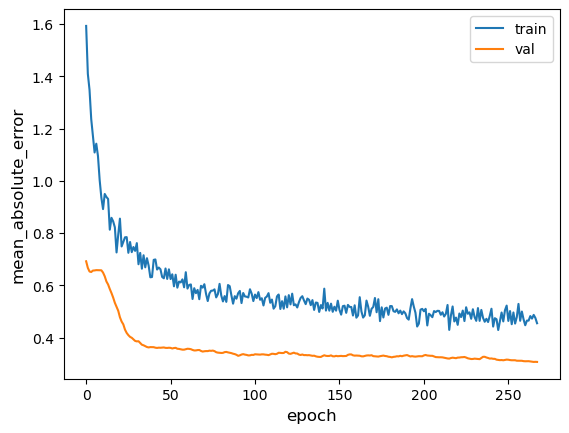

3/3 [==============================] - 0s 1ms/step - loss: 0.8325 - mean_absolute_error: 0.5156
Test accuracy 0.5156134366989136
Test loss 0.8325345516204834


In [219]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [220]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

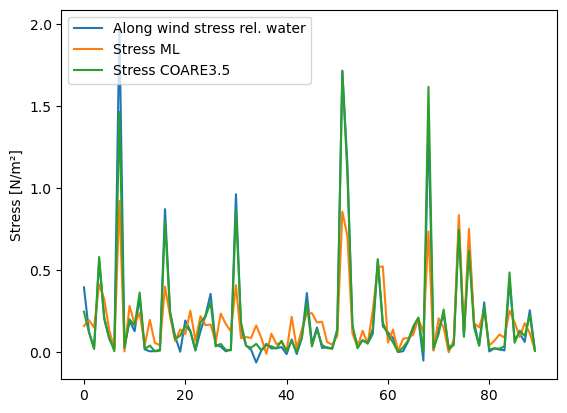

In [221]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [222]:
rmse(y_test.values, y_test_pred)

0.40668647431309857

In [223]:
rmse(y_test.values, c_test.values)

0.06884559918794826

In [224]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.87567519],
       [0.87567519, 1.        ]])

In [225]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98281594],
       [0.98281594, 1.        ]])

Text(0, 0.5, 'Stress ML [N/m²]')

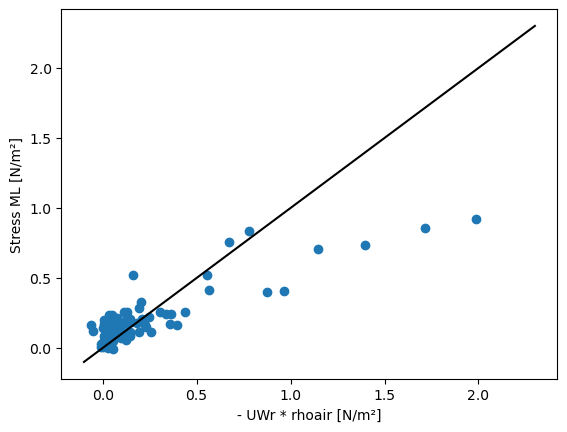

In [226]:
plt.scatter(y_test, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [38]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [39]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [40]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
7/7 [==============================] - 0s 19ms/step - loss: 3.2235 - mean_absolute_error: 1.3430 - val_loss: 0.6166 - val_mean_absolute_error: 0.6291
Epoch 2/500
7/7 [==============================] - 0s 4ms/step - loss: 2.6698 - mean_absolute_error: 1.2037 - val_loss: 0.5971 - val_mean_absolute_error: 0.6173
Epoch 3/500
7/7 [==============================] - 0s 4ms/step - loss: 2.5276 - mean_absolute_error: 1.1363 - val_loss: 0.5812 - val_mean_absolute_error: 0.6076
Epoch 4/500
7/7 [==============================] - 0s 4ms/step - loss: 1.9446 - mean_absolute_error: 1.0479 - val_loss: 0.5637 - val_mean_absolute_error: 0.5976
Epoch 5/500
7/7 [==============================] - 0s 4ms/step - loss: 1.9713 - mean_absolute_error: 1.0415 - val_loss: 0.5434 - val_mean_absolute_error: 0.5867
Epoch 6/500
7/7 [==============================] - 0s 4ms/step - loss: 1.2234 - mean_absolute_error: 0.8141 - val_loss: 0.5255 - val_mean_absolute_error: 0.5766
Epoch 7/500
7/7 [================

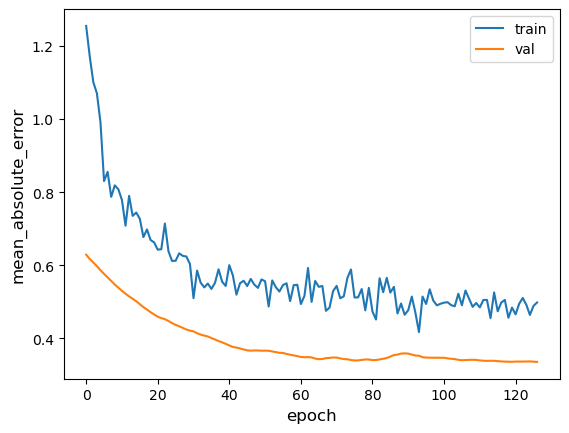

3/3 [==============================] - 0s 1ms/step - loss: 0.7521 - mean_absolute_error: 0.4812
Test accuracy 0.48115381598472595
Test loss 0.7520649433135986


In [41]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [47]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

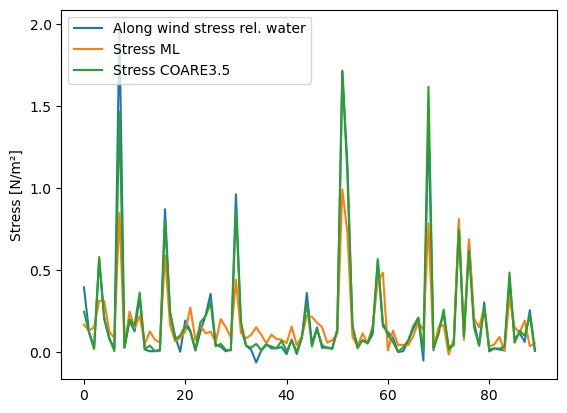

In [48]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

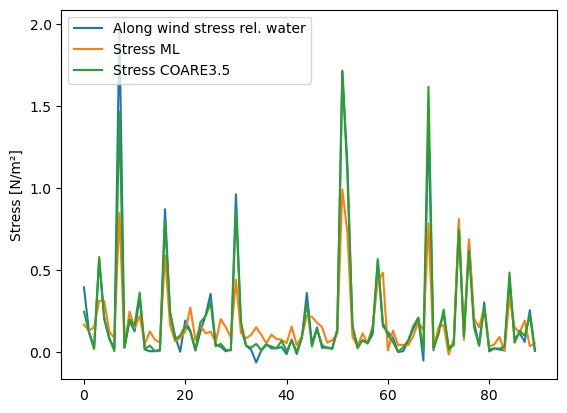

In [49]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [50]:
rmse(y_test.values, y_test_pred)

0.4082686544179268

In [51]:
rmse(y_test.values, c_test.values)

0.06884559918794826

In [52]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.90248581],
       [0.90248581, 1.        ]])

In [53]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98281594],
       [0.98281594, 1.        ]])

Text(0, 0.5, 'Modeled stress [N/m²]')

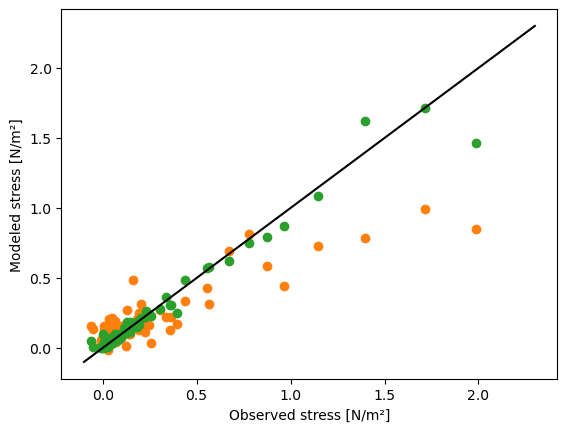

In [55]:
plt.scatter(y_test, y_test_pred, label='ML', color='C1')
plt.scatter(y_test, c_test, label='COARE', color='C2')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Observed stress [N/m²]') 
plt.ylabel('Modeled stress [N/m²]') 

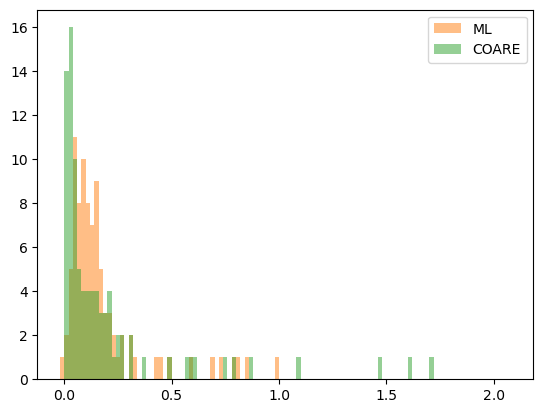

In [56]:
plt.hist(y_test_pred[y_test_pred[:, 0] > -2], label='ML', color='C1', alpha=0.5, bins=np.arange(-0.02, 2.1, 0.02)  )
plt.hist(c_test.values[y_test_pred[:, 0] > -2], label='COARE', color='C2', alpha=0.5, bins=np.arange(-0.02, 2.1, 0.02) )
plt.legend()

Text(0, 0.5, 'Modeled stress [N/m²]')

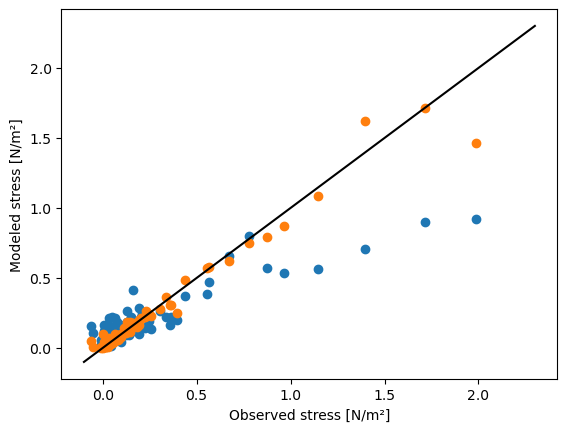

In [238]:
plt.scatter(y_test, y_test_pred, label='ML')
plt.scatter(y_test, c_test, label='COARE')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Observed stress [N/m²]') 
plt.ylabel('Modeled stress [N/m²]') 

In [239]:
OUT_STEPS = 1
num_features = 1
batch_size =256
epochs=500

metric = 'mean_absolute_error'

In [240]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [241]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
1/1 [==============================] - 1s 588ms/step - loss: 2.3633 - mean_absolute_error: 1.1896 - val_loss: 0.5213 - val_mean_absolute_error: 0.6210
Epoch 2/500
1/1 [==============================] - 0s 26ms/step - loss: 2.0330 - mean_absolute_error: 1.0751 - val_loss: 0.5101 - val_mean_absolute_error: 0.6152
Epoch 3/500
1/1 [==============================] - 0s 25ms/step - loss: 2.0705 - mean_absolute_error: 1.0957 - val_loss: 0.5018 - val_mean_absolute_error: 0.6117
Epoch 4/500
1/1 [==============================] - 0s 26ms/step - loss: 2.2759 - mean_absolute_error: 1.1207 - val_loss: 0.4950 - val_mean_absolute_error: 0.6092
Epoch 5/500
1/1 [==============================] - 0s 26ms/step - loss: 1.7246 - mean_absolute_error: 0.9741 - val_loss: 0.4883 - val_mean_absolute_error: 0.6062
Epoch 6/500
1/1 [==============================] - 0s 25ms/step - loss: 1.5411 - mean_absolute_error: 0.9595 - val_loss: 0.4827 - val_mean_absolute_error: 0.6030
Epoch 7/500
1/1 [==========

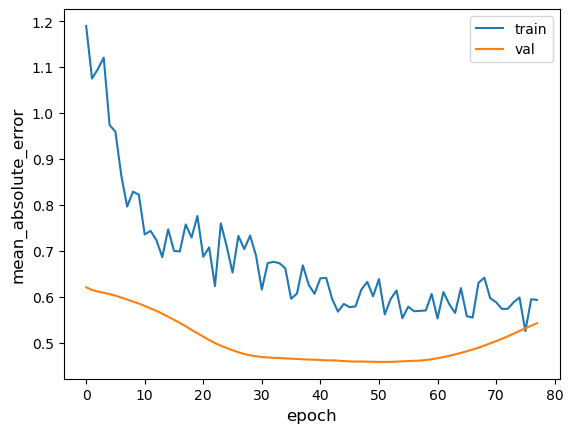

3/3 [==============================] - 0s 958us/step - loss: 2.1929 - mean_absolute_error: 0.7089
Test accuracy 0.7088792324066162
Test loss 2.1929328441619873


In [242]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [243]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

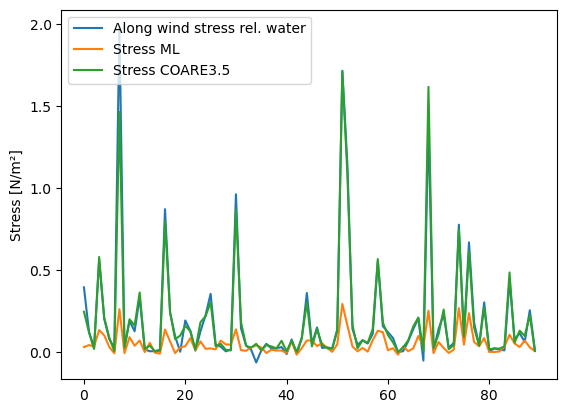

In [244]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [245]:
rmse(y_test.values, y_test_pred)

0.3916708339403988

In [246]:
rmse(y_test.values, c_test.values)

0.06884559918794826

In [247]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.86196088],
       [0.86196088, 1.        ]])

In [248]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98281594],
       [0.98281594, 1.        ]])

Text(0, 0.5, 'Stress ML [N/m²]')

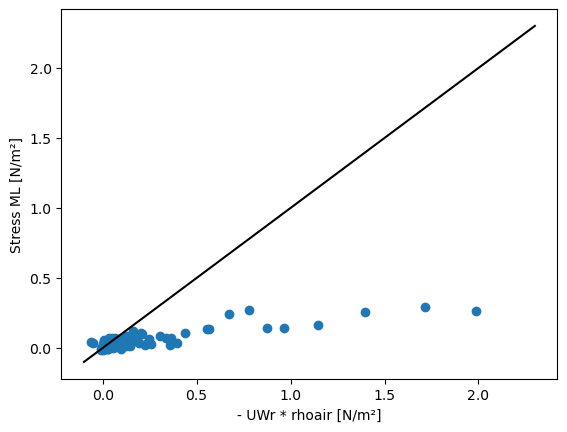

In [249]:
plt.scatter(y_test, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [250]:
OUT_STEPS = 1
num_features = 1
batch_size =256
epochs=500

metric = 'mean_absolute_error'

In [251]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [252]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
1/1 [==============================] - 1s 734ms/step - loss: 2.4606 - mean_absolute_error: 1.1434 - val_loss: 0.6300 - val_mean_absolute_error: 0.6873
Epoch 2/500
1/1 [==============================] - 0s 26ms/step - loss: 2.0995 - mean_absolute_error: 1.0920 - val_loss: 0.6163 - val_mean_absolute_error: 0.6806
Epoch 3/500
1/1 [==============================] - 0s 25ms/step - loss: 1.4406 - mean_absolute_error: 0.8885 - val_loss: 0.6039 - val_mean_absolute_error: 0.6744
Epoch 4/500
1/1 [==============================] - 0s 24ms/step - loss: 1.5928 - mean_absolute_error: 0.9686 - val_loss: 0.5914 - val_mean_absolute_error: 0.6678
Epoch 5/500
1/1 [==============================] - 0s 25ms/step - loss: 1.4499 - mean_absolute_error: 0.8966 - val_loss: 0.5801 - val_mean_absolute_error: 0.6616
Epoch 6/500
1/1 [==============================] - 0s 25ms/step - loss: 1.1561 - mean_absolute_error: 0.7969 - val_loss: 0.5697 - val_mean_absolute_error: 0.6563
Epoch 7/500
1/1 [==========

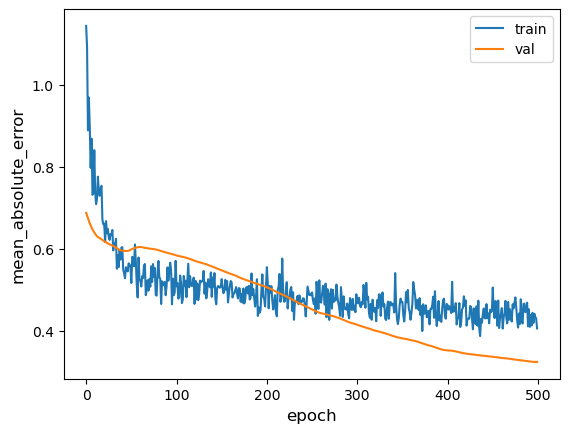

3/3 [==============================] - 0s 1ms/step - loss: 0.8199 - mean_absolute_error: 0.5048
Test accuracy 0.5047642588615417
Test loss 0.8198701739311218


In [253]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [254]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

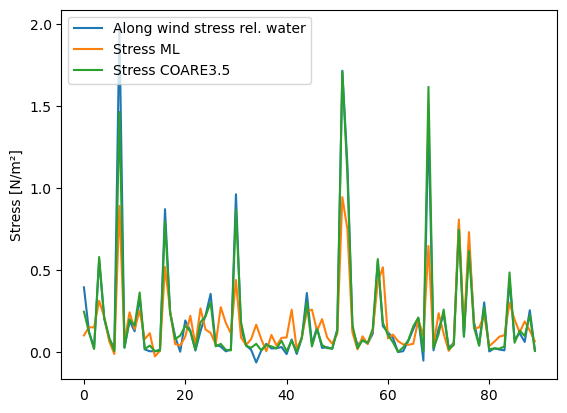

In [255]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [256]:
rmse(y_test.values, y_test_pred)

0.40773753127565326

In [257]:
rmse(y_test.values, c_test.values)

0.06884559918794826

In [258]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.88020081],
       [0.88020081, 1.        ]])

In [259]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98281594],
       [0.98281594, 1.        ]])

Text(0, 0.5, 'Stress ML [N/m²]')

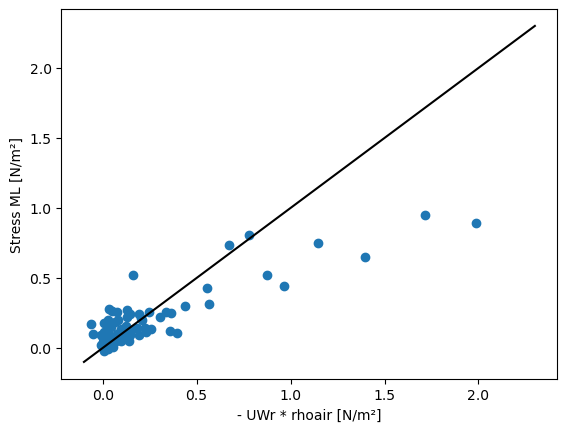

In [260]:
plt.scatter(y_test, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

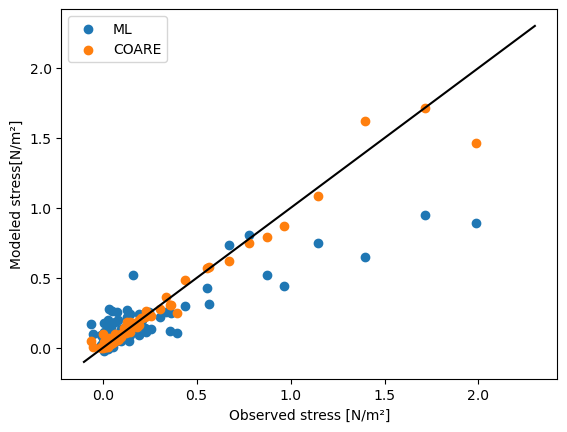

In [261]:
plt.scatter(y_test.values, y_test_pred, label='ML')
plt.scatter(y_test.values, c_test.values, label='COARE')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Observed stress [N/m²]') 
plt.ylabel('Modeled stress[N/m²]') 
plt.legend()

# predictors to use for the ML and validation: extraction


ml_predictors = [
    # # electromagnetic fluxes
    "IR",
    "Solar",
    # #---------- 
    # # specific humidities
    "Q10",
    "SSQ",
    "Qair",
    # #---------- 
    # # relative humidities
    "RH",
    # "RH10",
    # #---------- 
    # # air characteristics
    # "rhoair",
    # "P10",
    # "Pair",
    # #---------- 
    # # temperatures
    "SST",
    "T10",
    # "Tair",
    "Tsea",
    # "Tseasonic",
    # "Tsonic",
    # #---------- 
    # # waves
    # "Tm",
    "Tp",
    # "cp",
    "sigH",
    "sigHDir",
    # #---------- 
    # # wind characteristics
    # "U10e",
    "U10r",
    # "Ue",
    # "Ur",
    # "Wdir",
    "Wdirr",
    # #---------- 
    # # Obukhov scaling
    "moL",
    # "moLcbrt",
    # "moLclipped",
    # "moLinv",
    # #---------- 
    # # bulk fluxes
    "lhf",
    "shf",
    # # ----------
    # # composite variables
    # 'windspeed_over_wavecp',
    # 'mismatch_winddir_wavedir',
    # 'difference_specific_humidity',
    # # ----------
    # # others
    # "WTr",
    ## "Lv",
    # "stress",
]
